# Data Mining Project
- Filipe Coelho - id: m20200580
- Ivan Kisialiou - id: m20200998
- Jose Quintas - id: m20200673

## <br/>      

## Phase 1: Data Pre-Processing (Other columns)

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
from datetime import date

import re
from sklearn.preprocessing import MinMaxScaler

### Config some libraries

In [2]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 50

## <br/>

## Data Read

In [3]:
df = pd.read_csv('../Data/donors.csv', index_col=0)
df.head()

C:\Users\ivkis\anaconda3\envs\DM\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,20

In [4]:
df.shape

(95412, 475)

## <br/>

## Data Selection

 ## Donation history

- RAMNTALL  -->  Dollar amount of lifetime gifts to date
- NGIFTALL  -->  Number of lifetime gifts to date
- AVGGIFT  -->   Average dollar amount of gifts to date
- NUMPROM  -->   Lifetime number of promotions received to date
- NUMPRM12 -->   Number of promotions received in the last 12 months
- CARDPROM -->   Lifetime number of card promotions received to date
- CARDPRM12 -->  Number of card promotions received in the last 12 months
- CARDGIFT -->   Number of lifetime gifts to card promotions to date
- MINRAMNT -->   Dollar amount of smallest gift to date
- MAXRAMNT -->   Dollar amount of largest gift to date


### Data to generate/keep
- AVGGIFT - Average donated amount
- NGIFTALL / NUMPROM - Success percentage

In [5]:
selected_features = [
    'RAMNTALL',
    'NGIFTALL',
    'AVGGIFT',
    'NUMPROM',
    'NUMPRM12',
    'CARDPROM',
    'CARDPM12',
    'CARDGIFT', 
    'MINRAMNT', 
    'MAXRAMNT',
    'LASTGIFT', 
    'TIMELAG', 
]

## <br/>

### Checking DTypes and fix case necessary

In [6]:
df[selected_features].dtypes

RAMNTALL    float64
NGIFTALL      int64
AVGGIFT     float64
NUMPROM       int64
NUMPRM12      int64
CARDPROM      int64
CARDPM12      int64
CARDGIFT      int64
MINRAMNT    float64
MAXRAMNT    float64
LASTGIFT    float64
TIMELAG     float64
dtype: object

In [7]:
#fix dtypes
df['RAMNTALL'] = df['RAMNTALL'].astype('int64')

In [8]:
df[selected_features].head()

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG
0,240,31,7.741935,74,14,27,6,14,5.0,12.0,10.0,4.0
1,47,3,15.666667,32,13,12,6,1,10.0,25.0,25.0,18.0
2,202,27,7.481481,63,14,26,6,14,2.0,16.0,5.0,12.0
3,109,16,6.812500,66,14,27,6,7,2.0,11.0,10.0,9.0
4,254,37,6.864865,113,25,43,10,8,3.0,15.0,15.0,14.0


## <br/>
## Data Engineering

In [9]:
modified_df = df[selected_features].copy()

### Applying Log10 on filtered features

In [10]:
def log10_cheat(n):
    if n < 1: 
        return -1
        
    elif n >=1: 
        return(np.log10(n))

C:\Users\ivkis\anaconda3\envs\DM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ivkis\anaconda3\envs\DM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-11-33639762f72c>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ivkis\anaconda3\envs\DM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From ver

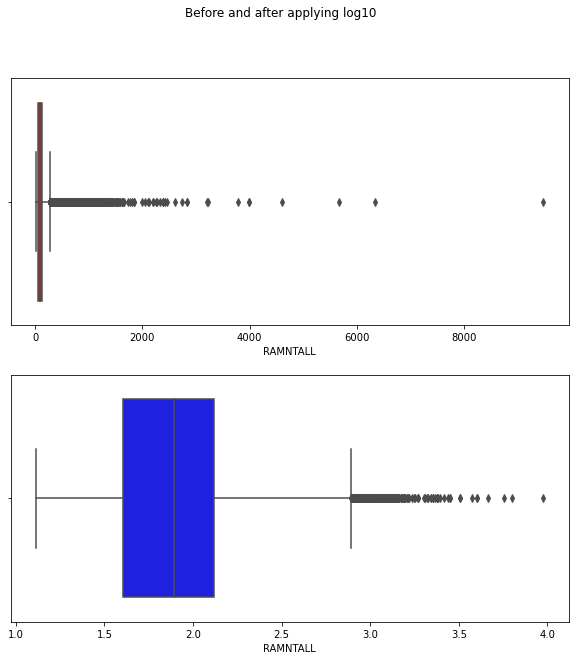

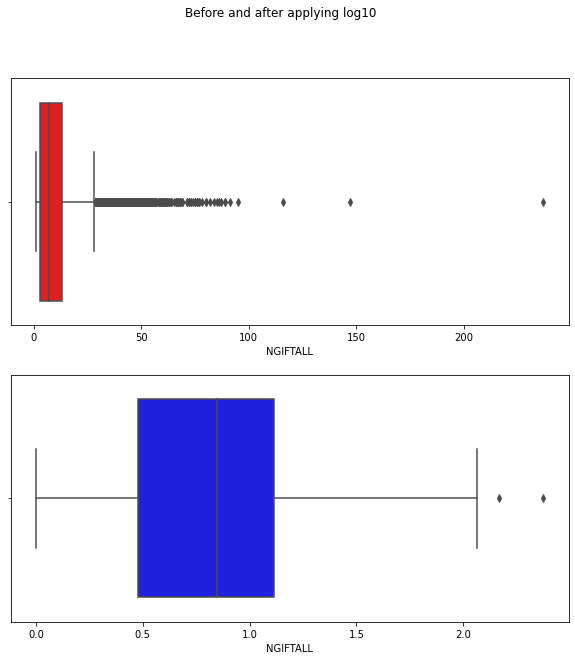

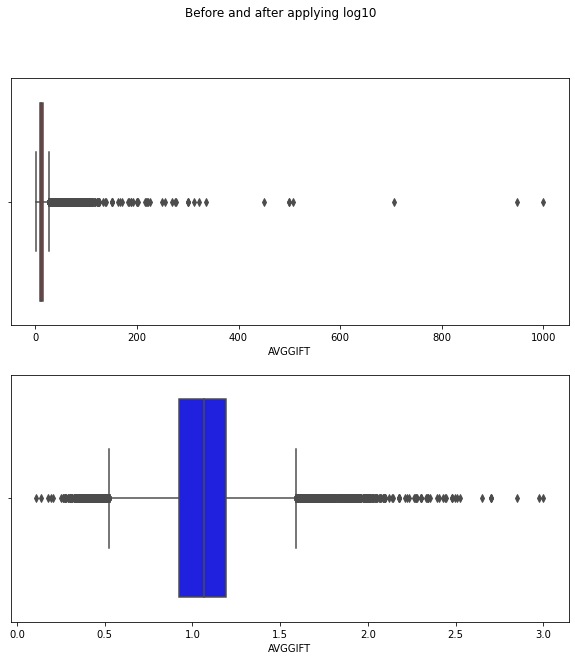

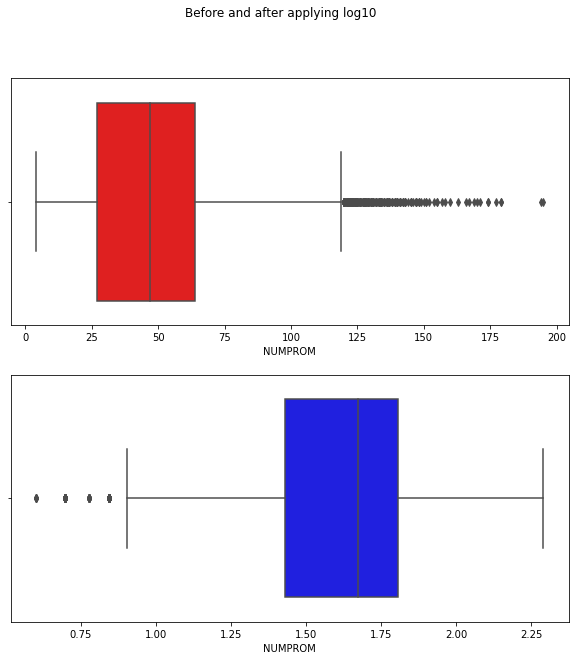

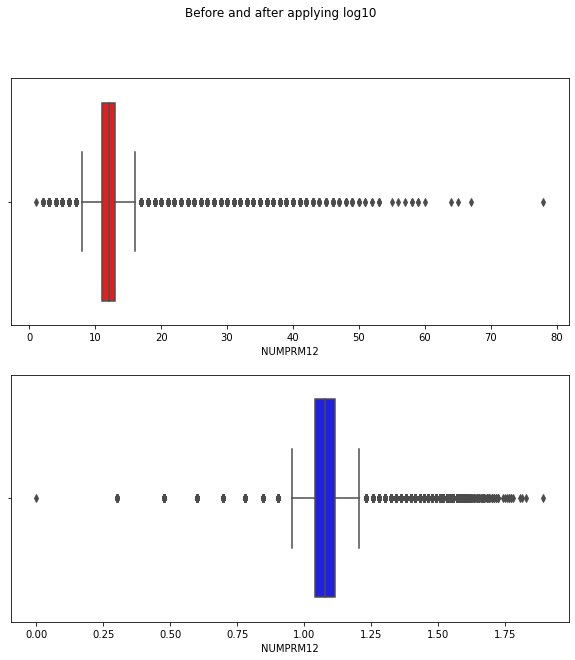

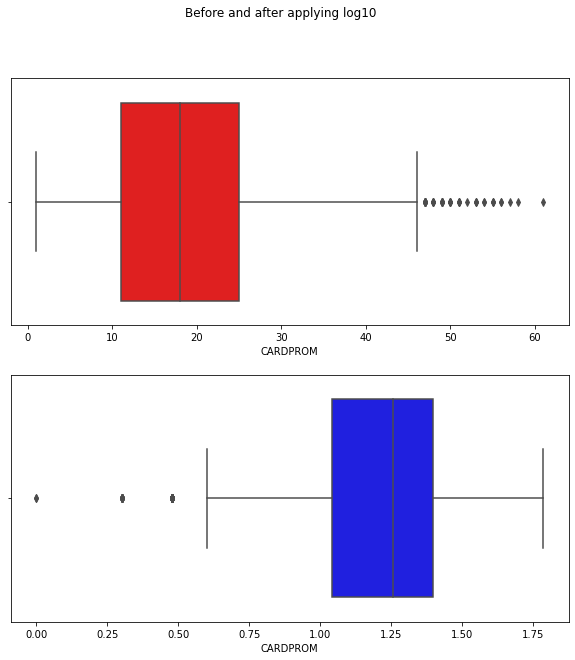

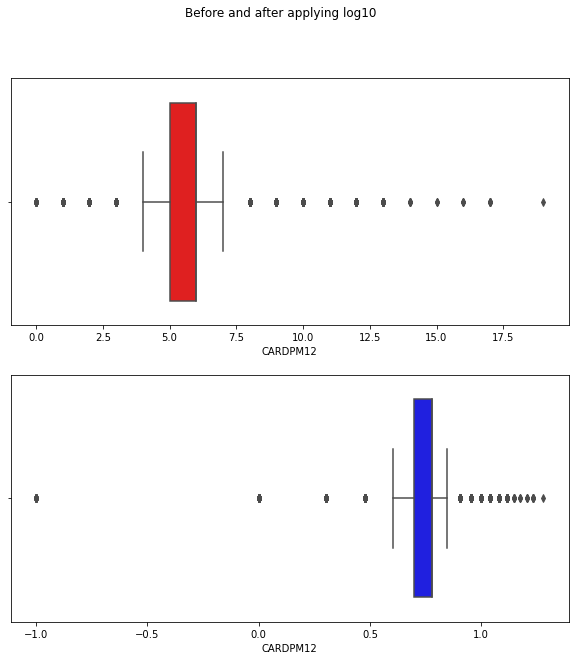

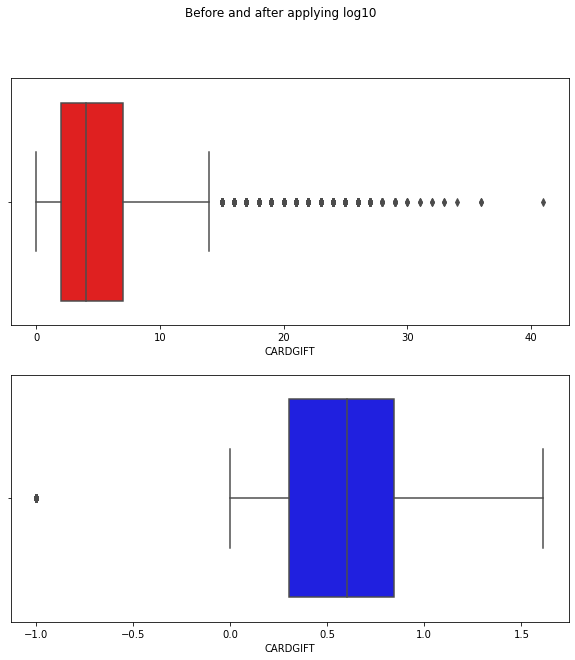

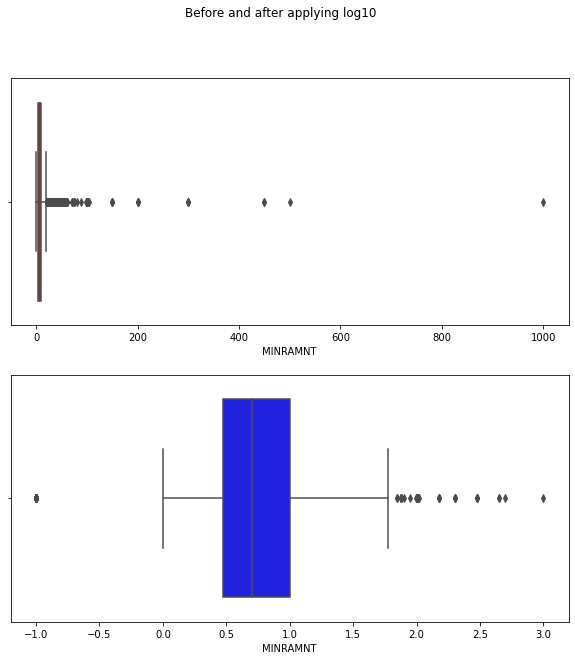

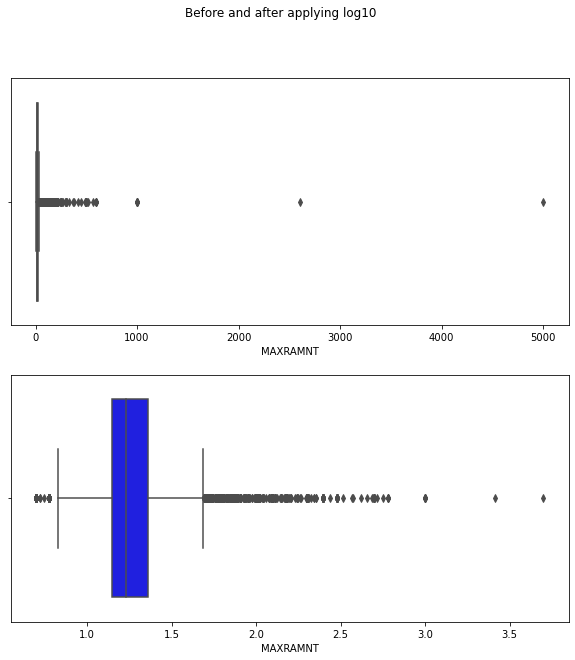

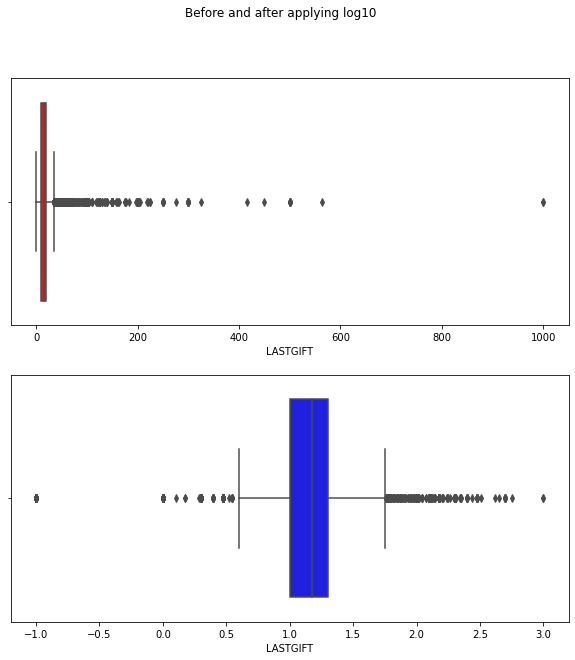

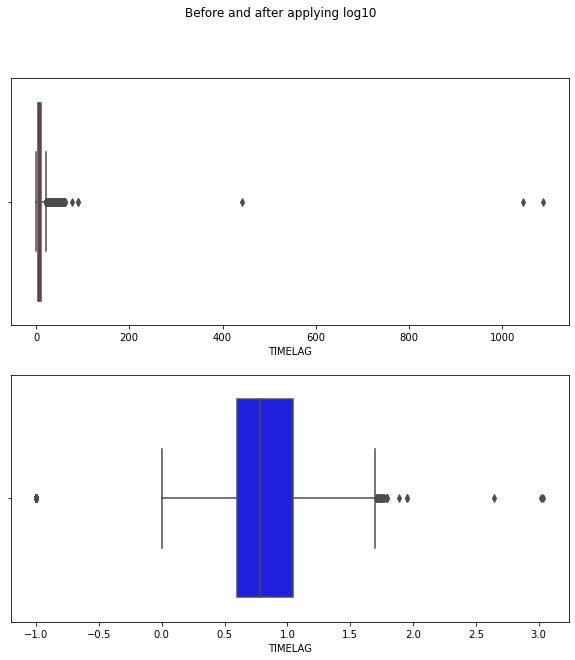

In [11]:
for column in selected_features: 
    modified_df[column] = modified_df[column].apply(lambda x: log10_cheat(x))
    
    #Plotting Before + After
    fig, ax = plt.subplots(2,1, figsize=(10,10))
    fig.suptitle('Before and after applying log10')
    sns.boxplot(df[column], ax = ax[0], color = 'red')
    sns.boxplot(modified_df[column], ax = ax[1], color ='blue')
    
    fig.show()

## <br/>
### Generating Time Based columns

# </br>
#### Time between minimum and maximum donation

In [12]:
MINRDATE_datetime = pd.to_datetime(df['MINRDATE'], infer_datetime_format=True)
MAXRDATE_datetime = pd.to_datetime(df['MAXRDATE'], infer_datetime_format=True)

modified_df['minmax_time_delta'] = (MINRDATE_datetime - MAXRDATE_datetime).dt.days

# </br>
#### Time between last donation and the closest day to present

In [13]:
last_datetime = pd.to_datetime('2017-06-01', infer_datetime_format=True)

In [14]:
last_dates = pd.to_datetime(df['LASTDATE'], infer_datetime_format=True)
delta = last_dates.apply(lambda date: (last_datetime - date).days )

modified_df['last_gift'] = delta.apply(lambda x: log10_cheat(x))

# </br>
#### Customer Loyalty to PVA

In [15]:
first_dates = pd.to_datetime(df['FISTDATE'], infer_datetime_format=True)
delta = first_dates.apply(lambda date: (last_datetime - date).days)

In [16]:
modified_df['customer_age'] = delta.apply(lambda x: log10_cheat(x))

## </br>

### Generating Money based columns

In [17]:
def log2_cheat(n):
    if n < 1: 
        return -1

    elif n >=1: 
        return(np.log2(n))

In [18]:
modified_df['maxmin_dollar_diff'] = df['MAXRAMNT'] - df['MINRAMNT']
modified_df['maxmin_dollar_diff'] = modified_df['maxmin_dollar_diff'].apply(lambda x: log2_cheat(x))

In [19]:
modified_df['maxmin_dollar_diff']

0        2.807355
1        3.906891
2        3.807355
3        3.169925
4        3.584963
           ...   
95407   -1.000000
95408   -1.000000
95409    2.807355
95410    4.000000
95411    7.577429
Name: maxmin_dollar_diff, Length: 95412, dtype: float64

## </br>

### Success Percentage (Number donation vs number of promotions targeted)

In [20]:
# NGIFTALL / NUMPROM - Success percentage
def promotions_conversion_rate(row): 
    
    if row['NUMPROM'] != 0: 
        val =row['NGIFTALL'] / row['NUMPROM']
    else:
        val = 0 
        
    return val 


modified_df['SUCCESS_PCT'] = df.apply(promotions_conversion_rate, axis = 1)
modified_df['SUCCESS_PCT'].head()

0    0.418919
1    0.093750
2    0.428571
3    0.242424
4    0.327434
Name: SUCCESS_PCT, dtype: float64

## </br>

### Percentage Time Lapsed (Column that contains percentage of time passed on a certain category)

In [21]:
def get_percentage_as_category(source_dataframe, target_df, category):
    re_expression = re.compile('^RFA_\d{1,2}$')

    rfa_columns = [column for column in source_dataframe.columns.values if re_expression.match(column)]

    rfas = source_dataframe[rfa_columns].copy()

    rfas = rfas.applymap(lambda val: 1 if val[0] == category else 0)
    
    target_df['PCT_TIME_LAPSED_%s' % category] =  rfas.sum(axis=1) / df['NUMPROM']

    return target_df

In [22]:
categories = ['F','N','A','L','I','S']

In [23]:
for category in categories:
    modified_df = get_percentage_as_category(df, modified_df, category)
    
modified_df.head()

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,minmax_time_delta,last_gift,customer_age,maxmin_dollar_diff,SUCCESS_PCT,PCT_TIME_LAPSED_F,PCT_TIME_LAPSED_N,PCT_TIME_LAPSED_A,PCT_TIME_LAPSED_L,PCT_TIME_LAPSED_I,PCT_TIME_LAPSED_S
0,2.380211,1.491362,0.888850,1.869232,1.146128,1.431364,0.778151,1.146128,0.698970,1.079181,1.000000,0.602060,-549,2.738781,3.442323,2.807355,0.418919,0.00000,0.000,0.000000,0.013514,0.000000,0.297297
1,1.672098,0.477121,1.194977,1.505150,1.113943,1.079181,0.778151,0.000000,1.000000,1.397940,1.397940,1.255273,-791,2.738781,3.126781,3.906891,0.093750,0.03125,0.125,0.312500,0.062500,0.000000,0.000000
2,2.305351,1.431364,0.873988,1.799341,1.146128,1.414973,0.778151,1.146128,0.301030,1.204120,0.698970,1.079181,-243,2.738781,3.432649,3.807355,0.428571,0.00000,0.000,0.000000,0.015873,0.000000,0.285714
3,2.037426,1.204120,0.833307,1.819544,1.146128,1.431364,0.778151,0.845098,0.301030,1.041393,1.000000,0.954243,-2557,2.738781,3.576687,3.169925,0.242424,0.00000,0.000,0.060606,0.015152,0.000000,0.227273
4,2.404834,1.568202,0.836632,2.053078,1.397940,1.633468,1.000000,0.903090,0.477121,1.176091,1.176091,1.146128,-822,2.713491,3.823930,3.584963,0.327434,0.00000,0.000,0.132743,0.044248,0.017699,0.000000


## </br>

## Creating features from *RAMNT* and *RFA* columns

In [25]:
re_expression = re.compile('^RFA_\d{1,2}$')
rfa_columns = [column for column in df.columns.values if re_expression.match(column)]

In [26]:
re_expression = re.compile('^RAMNT_\d{1,2}$')
ramnt_columns = [column for column in df.columns.values if re_expression.match(column)]

## </br>
### Variance on donation value

In [27]:
#Calculate variance
modified_df['GIFT_VAR'] = df[ramnt_columns].var(axis=1)
#Fill NaN's
modified_df['GIFT_VAR'].fillna(0, inplace=True)
#Apply log10
modified_df['GIFT_VAR'] = modified_df['GIFT_VAR'].apply(lambda x: log10_cheat(x))

modified_df['GIFT_VAR'].head()

0   -1.000000
1    1.926857
2    0.410174
3    0.591595
4    1.096910
Name: GIFT_VAR, dtype: float64

## </br>

### Date columns
ADATE and RDATE

**Lags between ADATE and RDATE**  

In [28]:
df_ = df.copy()
lag_cols = ['LAG_%s' % i for i in range(3,25)]

# lags in days
for i in range(3,25):
    df_['LAG_%s' % i] = (pd.to_datetime(df_['RDATE_%s' % i]) -
                         pd.to_datetime(df_['ADATE_%s' % i])) / np.timedelta64(1, 'D')
    
df_['LAG_avg'] = df_[lag_cols].mean(axis=1)
df_['LAG_variance'] = df_[lag_cols].var(axis=1)
df_['LAG_min'] = df_[lag_cols].min(axis=1)
df_['LAG_max'] = df_[lag_cols].max(axis=1)
df_[['LAG_avg', 'LAG_variance', 'LAG_min', 'LAG_max']]

,LAG_avg,LAG_variance,LAG_min,LAG_max
0,34.428571,448.285714,0.0,61.0
1,30.500000,0.500000,30.0,31.0
2,8.857143,228.809524,0.0,31.0
3,39.000000,537.000000,0.0,61.0
4,0.000000,0.000000,0.0,0.0
...,...,...,...,...
95407,31.000000,NaN,31.0,31.0
95408,60.000000,NaN,60.0,60.0
95409,22.750000,850.250000,0.0,61.0
95410,47.555556,1665.027778,-31.0,92.0


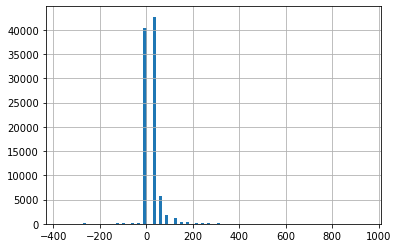

In [29]:
df_['LAG_min'].hist(bins=100);
# negatives are anomalies

negatives are anomalies, we must delete them later

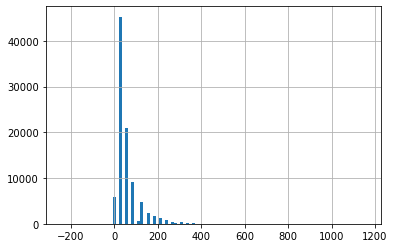

In [30]:
df_['LAG_max'].hist(bins=100);

**Treatment of negative lags (ADATE > RDATE)**  


In [31]:
df_ = df.copy()
lag_cols = ['LAG_%s' % i for i in range(3,25)]
rdate_cols = ['RDATE_%s' % i for i in range(3,25)]
adate_cols = ['ADATE_%s' % i for i in range(3,25)]

# let's replace RDATEs that are before ADATEs with NaNs
# Replace NaNs
df_[rdate_cols] = df_[rdate_cols].fillna('1900-01-01')
df_[adate_cols] = df_[adate_cols].fillna('1901-01-01') # NaN < NaN -> NaN

# Turn errors back to NaNs
for i in range(3,25):
    df_['RDATE_%s' % i] = df_[['RDATE_%s' % i,'ADATE_%s' % i]] \
                             .apply(lambda row: np.nan if row['RDATE_%s' % i] < row['ADATE_%s' % i]
                                    else row['RDATE_%s' % i], axis=1)
df_[adate_cols] = np.where(df_[adate_cols]=='1901-01-01', np.NaN, df_[adate_cols])
    
# lags in days
for i in range(3,25):
    df_['LAG_%s' % i] = (pd.to_datetime(df_['RDATE_%s' % i]) -
                         pd.to_datetime(df_['ADATE_%s' % i])) / np.timedelta64(1, 'D')
    
df_['LAG_avg'] = df_[lag_cols].mean(axis=1)
df_['LAG_variance'] = df_[lag_cols].var(axis=1)
df_['LAG_min'] = df_[lag_cols].min(axis=1)
df_['LAG_max'] = df_[lag_cols].max(axis=1)
df_[['LAG_avg', 'LAG_variance', 'LAG_min', 'LAG_max']]

,LAG_avg,LAG_variance,LAG_min,LAG_max
0,34.428571,448.285714,0.0,61.0
1,30.500000,0.500000,30.0,31.0
2,8.857143,228.809524,0.0,31.0
3,39.000000,537.000000,0.0,61.0
4,0.000000,0.000000,0.0,0.0
...,...,...,...,...
95407,31.000000,NaN,31.0,31.0
95408,60.000000,NaN,60.0,60.0
95409,22.750000,850.250000,0.0,61.0
95410,57.375000,911.125000,30.0,92.0


In [32]:
df_['LAG_min'].min()
# no more negatives

0.0

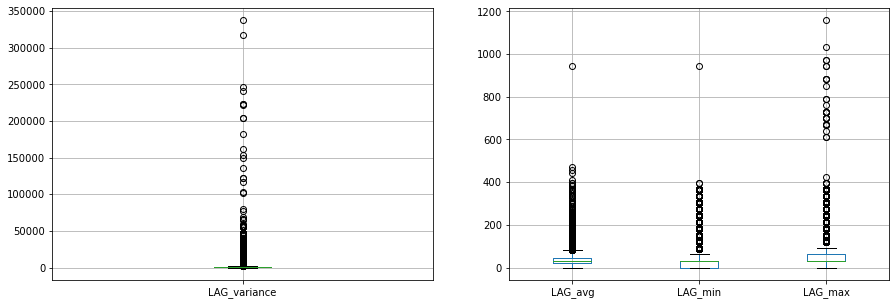

In [33]:
# distribution of new features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_[['LAG_variance']].boxplot(ax=axes[0])
df_[['LAG_avg','LAG_min','LAG_max']].boxplot()
plt.show()

**Scaling**

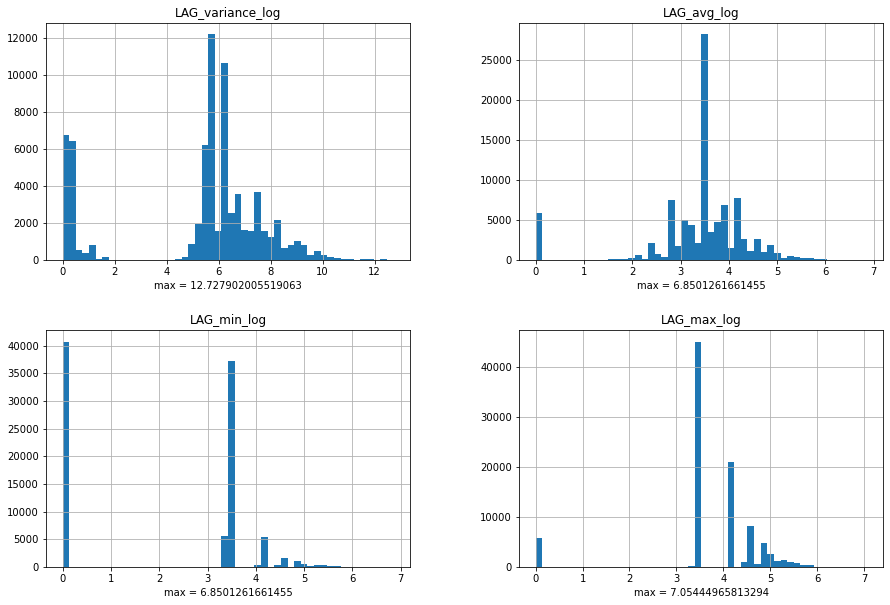

In [34]:
# log-scale them
df_['LAG_variance_log'] = df_['LAG_variance'].apply(lambda x: np.log(x+1))
df_['LAG_avg_log'] = df_['LAG_avg'].apply(lambda x: np.log(x+1))
df_['LAG_min_log'] = df_['LAG_min'].apply(lambda x: np.log(x+1))
df_['LAG_max_log'] = df_['LAG_max'].apply(lambda x: np.log(x+1))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df_[['LAG_variance_log']].hist(bins=50, ax=axes[0, 0])
df_[['LAG_avg_log']].hist(bins=50, ax=axes[0, 1])
df_[['LAG_min_log']].hist(bins=50, ax=axes[1, 0])
df_[['LAG_max_log']].hist(bins=50, ax=axes[1, 1])
axes[0, 0].set_xlabel('max = {}'.format(df_['LAG_variance_log'].max()))
axes[0, 1].set_xlabel('max = {}'.format(df_['LAG_avg_log'].max()))
axes[1, 0].set_xlabel('max = {}'.format(df_['LAG_min_log'].max()))
axes[1, 1].set_xlabel('max = {}'.format(df_['LAG_max_log'].max()))
plt.show()

In [35]:
# Min-Max scaling
df_['LAG_avg_log'] = MinMaxScaler().fit_transform(df_[['LAG_avg_log']])
df_['LAG_variance_log'] = MinMaxScaler().fit_transform(df_[['LAG_variance_log']])
df_['LAG_min_log'] = MinMaxScaler().fit_transform(df_[['LAG_min_log']])
df_['LAG_max_log'] = MinMaxScaler().fit_transform(df_[['LAG_max_log']])

In [36]:
df_lags = df_[['LAG_avg_log', 'LAG_variance_log', 'LAG_min_log', 'LAG_max_log']].copy()
df_lags.head(3)

,LAG_avg_log,LAG_variance_log,LAG_min_log,LAG_max_log
0,0.520796,0.479864,0.000000,0.585040
1,0.503639,0.031856,0.501303,0.491284
2,0.334037,0.427191,0.000000,0.491284


## </br>

### RFA columns

*According to metadata:*    
**RECENCY:** F, N, A, L, I, S  

**FREQUENCY:** 1, 2, 3, 4 (=4+)  
The period of recency for all groups except L and I is the last 12 months.  
For L it is 13-24 months ago, and for I it is 25-36 months ago.  
   
**AMOUNT $:**  
A(0.01-1.99) B(2.00-2.99) C(3.00-4.99) D(5.00-9.99)  
E(10.00-14.99) F(15.00-24.99) G(25.00+)  

In [37]:
df_rfa = df[rfa_columns]
df_rfa.head()

,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24
0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E
1,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E
2,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D
3,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,
4,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D


In [38]:
rfa_all = df_rfa.values.tolist()

# unique codes
rfa_all = set([val for col in rfa_all for val in col])

# unique values for 1st byte
rfa_R = set([val[0] for val in rfa_all])

In [39]:
# possible lengths of codes
rfa_all_length = set([len(val) for val in rfa_all])
rfa_all_length

{1, 2, 3}

In [40]:
print(sorted(rfa_all))

[' ', '1C', '1D', '1E', '1F', '1G', '2D', '2E', '2F', '3E', '3F', '4E', 'A1A', 'A1B', 'A1C', 'A1D', 'A1E', 'A1F', 'A1G', 'A2B', 'A2C', 'A2D', 'A2E', 'A2F', 'A2G', 'A3B', 'A3C', 'A3D', 'A3E', 'A3F', 'A3G', 'A4A', 'A4B', 'A4C', 'A4D', 'A4E', 'A4F', 'A4G', 'F1A', 'F1B', 'F1C', 'F1D', 'F1E', 'F1F', 'F1G', 'I1B', 'I1C', 'I1D', 'I1E', 'I1F', 'I1G', 'I2C', 'I2D', 'I2E', 'I2F', 'I2G', 'I3C', 'I3D', 'I3E', 'I3F', 'I3G', 'I4C', 'I4D', 'I4E', 'I4F', 'I4G', 'L1C', 'L1D', 'L1E', 'L1F', 'L1G', 'L2C', 'L2D', 'L2E', 'L2F', 'L2G', 'L3C', 'L3D', 'L3E', 'L3F', 'L3G', 'L4C', 'L4D', 'L4E', 'L4F', 'L4G', 'N1B', 'N1C', 'N1D', 'N1E', 'N1F', 'N1G', 'N2A', 'N2B', 'N2C', 'N2D', 'N2E', 'N2F', 'N2G', 'N3B', 'N3C', 'N3D', 'N3E', 'N3F', 'N3G', 'N4C', 'N4D', 'N4E', 'N4F', 'N4G', 'P1A', 'P1B', 'P1C', 'P1D', 'P1E', 'P1F', 'P1G', 'S2A', 'S2B', 'S2C', 'S2D', 'S2E', 'S2F', 'S2G', 'S3A', 'S3B', 'S3C', 'S3D', 'S3E', 'S3F', 'S3G', 'S4A', 'S4B', 'S4C', 'S4D', 'S4E', 'S4F', 'S4G', 'U1C', 'U1D', 'U1E', 'U1F', 'U1G']


Let's explore anomalies in 1st byte

In [41]:
sorted(rfa_R)

[' ', '1', '2', '3', '4', 'A', 'F', 'I', 'L', 'N', 'P', 'S', 'U']

**Anomalies:**  
1) Empty 1st byte = empty cell  
2) Digits in 1st byte = cells starting from 2nd byte of RFA code  
3) 'P' -- unknown recency code, possible handwriting error for F   
4) 'U' -- unknow recency code, possibly stands for Unknown  

**(2) Digits**

In [42]:
# Seeking the columns containing digits at 1st place
for val in ['1', '2', '3', '4']:
    print('----')
    print(val)
    for i in range(df_rfa.shape[1]):
        ser = df_rfa[df_rfa.iloc[:,i].str.startswith(val)].iloc[:,i].head()
        if len(ser) > 0:
            display(ser)

----
1


13722    1D
25868    1E
27515    1D
32696    1C
41932    1G
Name: RFA_23, dtype: object

----
2


7469     2F
21445    2D
28873    2F
32397    2F
48720    2E
Name: RFA_23, dtype: object

----
3


18855    3E
48354    3E
65151    3F
82070    3E
Name: RFA_23, dtype: object

----
4


61927    4E
Name: RFA_23, dtype: object

**Starting from numbers:** only RFA_23  
promo FS : blank cards that fold into thirds with labels  
year 2014  

Let's treat it

In [43]:
# 'U' for 'unknown'
df_rfa['RFA_23'] = df_rfa['RFA_23'].apply(lambda x: x.replace(x, 'U'+x) if x[0] in ['1','2','3','4'] else x)

# unique Recency codes now
set([val[0] for col in df_rfa.values.tolist() for val in col])

<ipython-input-43-b0a104ab2293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfa['RFA_23'] = df_rfa['RFA_23'].apply(lambda x: x.replace(x, 'U'+x) if x[0] in ['1','2','3','4'] else x)


{' ', 'A', 'F', 'I', 'L', 'N', 'P', 'S', 'U'}

**(3) 'P', 'U'**

In [44]:
[code for code in list(rfa_all) if code[0]=='P']

['P1F', 'P1D', 'P1E', 'P1C', 'P1G', 'P1A', 'P1B']

In [45]:
[code for code in list(rfa_all) if code[0]=='U']

['U1C', 'U1F', 'U1E', 'U1D', 'U1G']

all above have frequency 1

In [46]:
# Let's keep U for unknown and also replace P with U
df_rfa = df_rfa.applymap(lambda x: x.replace('P', 'U'))

# Replace empty with all unknown
df_rfa = df_rfa.applymap(lambda x: x.replace(' ', 'UUU')).fillna('UUU')

# unique RFA codes now
rfa_all = sorted(set([val for col in df_rfa.values.tolist() for val in col]))
print(rfa_all)

['A1A', 'A1B', 'A1C', 'A1D', 'A1E', 'A1F', 'A1G', 'A2B', 'A2C', 'A2D', 'A2E', 'A2F', 'A2G', 'A3B', 'A3C', 'A3D', 'A3E', 'A3F', 'A3G', 'A4A', 'A4B', 'A4C', 'A4D', 'A4E', 'A4F', 'A4G', 'F1A', 'F1B', 'F1C', 'F1D', 'F1E', 'F1F', 'F1G', 'I1B', 'I1C', 'I1D', 'I1E', 'I1F', 'I1G', 'I2C', 'I2D', 'I2E', 'I2F', 'I2G', 'I3C', 'I3D', 'I3E', 'I3F', 'I3G', 'I4C', 'I4D', 'I4E', 'I4F', 'I4G', 'L1C', 'L1D', 'L1E', 'L1F', 'L1G', 'L2C', 'L2D', 'L2E', 'L2F', 'L2G', 'L3C', 'L3D', 'L3E', 'L3F', 'L3G', 'L4C', 'L4D', 'L4E', 'L4F', 'L4G', 'N1B', 'N1C', 'N1D', 'N1E', 'N1F', 'N1G', 'N2A', 'N2B', 'N2C', 'N2D', 'N2E', 'N2F', 'N2G', 'N3B', 'N3C', 'N3D', 'N3E', 'N3F', 'N3G', 'N4C', 'N4D', 'N4E', 'N4F', 'N4G', 'S2A', 'S2B', 'S2C', 'S2D', 'S2E', 'S2F', 'S2G', 'S3A', 'S3B', 'S3C', 'S3D', 'S3E', 'S3F', 'S3G', 'S4A', 'S4B', 'S4C', 'S4D', 'S4E', 'S4F', 'S4G', 'U1A', 'U1B', 'U1C', 'U1D', 'U1E', 'U1F', 'U1G', 'U2D', 'U2E', 'U2F', 'U3E', 'U3F', 'U4E', 'UUU']


In [47]:
rfa_F = set([val[-2] for val in rfa_all])
rfa_A = set([val[-1] for val in rfa_all])
print(sorted(rfa_F))
print(sorted(rfa_A))

['1', '2', '3', '4', 'U']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']


For first-time-donor statuses (F) let's count RDATEs that are **before** given promotion date ADATE

In [48]:
startwith = 'F'
      
for j in range(3, 25):
# loop through promotions 

    # RDATEs except RDATE_j
    rdate_cols = ['RDATE_%s' % i for i in range(3, 25)] 
    
    # filtered dataframe - only First-time donors for promo j
    df_ = df[df['RFA_%s' % j].str.startswith(startwith)][['RFA_%s' % j] + ['ADATE_%s' % j] + rdate_cols]
    df_[rdate_cols] = df_[rdate_cols].fillna('2200-01-01')
    
    # we replace with '1' those RDATEs that are earlier than given ADATE
    for col in rdate_cols:
        df_[col] = df_.apply(lambda row: 1 if row[col]<row['ADATE_%s' % j] else 0, axis=1)
        
    df_['gifts_before'] = df_[rdate_cols].apply(lambda row: row.sum(), axis=1)
    df_ = df_.drop(columns=rdate_cols)
    
    print('---')
    print('rows starting with {} for promo_{}:'.format(startwith, j), len(df_))
    print(df_['gifts_before'].value_counts())

---
rows starting with F for promo_3: 8316
1     7757
0      226
2      190
3       52
4       31
6       18
5       18
7        8
9        6
8        6
10       2
12       1
11       1
Name: gifts_before, dtype: int64
---
rows starting with F for promo_4: 8361
1     7757
0      230
2      199
3       76
4       38
5       21
6       19
7        7
8        6
9        3
10       2
14       1
12       1
11       1
Name: gifts_before, dtype: int64
---
rows starting with F for promo_5: 0
Series([], Name: gifts_before, dtype: int64)
---
rows starting with F for promo_6: 10037
1     8512
2      790
0      543
3       80
4       39
6       22
5       20
8       15
7       10
9        3
10       2
11       1
Name: gifts_before, dtype: int64
---
rows starting with F for promo_7: 7135
1     5427
2     1003
0      387
3      226
4       38
6       19
5       17
7        8
8        4
9        3
10       2
11       1
Name: gifts_before, dtype: int64
---
rows starting with F for promo_8: 7325
1     

Above there are anomalies, that means either they are not F actually, or dates are entered in the wrong way.  
Let's assume the second option.

**DECODING RFA**

In [49]:
for col in df_rfa.columns.values:
    df_rfa['R_'+col[4:]] = df_rfa[col].str[0]
    df_rfa['F_'+col[4:]] = df_rfa[col].str[1].replace('U', np.nan).astype('float16')
    df_rfa['A_'+col[4:]] = df_rfa[col].str[2].replace({'A':1,
                                                         'B':2,
                                                         'C':3,
                                                         'D':4,
                                                         'E':5,
                                                         'F':6,
                                                         'G':7,
                                                         'U':np.nan})
    
df_rfa = df_rfa.drop(columns=rfa_columns)
df_rfa.head()

,R_2,F_2,A_2,R_3,F_3,A_3,R_4,F_4,A_4,R_5,F_5,A_5,R_6,F_6,A_6,R_7,F_7,A_7,R_8,F_8,A_8,R_9,F_9,A_9,R_10,F_10,A_10,R_11,F_11,A_11,R_12,F_12,A_12,R_13,F_13,A_13,R_14,F_14,A_14,R_15,F_15,A_15,R_16,F_16,A_16,R_17,F_17,A_17,R_18,F_18,A_18,R_19,F_19,A_19,R_20,F_20,A_20,R_21,F_21,A_21,R_22,F_22,A_22,R_23,F_23,A_23,R_24,F_24,A_24
0,L,4.0,5,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0
1,L,2.0,7,A,2.0,7.0,A,2.0,7.0,A,2.0,7.0,A,2.0,7.0,A,1.0,5.0,A,1.0,5.0,A,1.0,5.0,A,1.0,5.0,A,1.0,5.0,A,1.0,5.0,U,NaN,NaN,U,NaN,NaN,U,NaN,NaN,L,1.0,5.0,U,NaN,NaN,U,NaN,NaN,N,1.0,5.0,N,1.0,5.0,N,1.0,5.0,N,1.0,5.0,U,NaN,NaN,F,1.0,5.0
2,L,4.0,5,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,6.0,S,4.0,6.0,S,4.0,6.0,U,NaN,NaN,S,4.0,6.0,S,4.0,6.0,S,4.0,6.0,S,4.0,6.0,S,4.0,6.0,S,4.0,6.0,U,NaN,NaN,S,4.0,4.0,S,4.0,4.0,U,NaN,NaN,U,NaN,NaN,S,4.0,4.0,S,4.0,4.0,S,3.0,4.0
3,L,4.0,5,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,U,NaN,NaN,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,4.0,5.0,S,2.0,4.0,S,2.0,4.0,A,1.0,4.0,A,1.0,4.0,A,1.0,4.0,A,1.0,4.0,U,NaN,NaN,U,NaN,NaN
4,L,2.0,6,A,2.0,6.0,A,2.0,6.0,A,2.0,6.0,A,1.0,4.0,I,2.0,4.0,A,1.0,5.0,A,1.0,5.0,L,1.0,4.0,A,1.0,5.0,A,1.0,5.0,L,1.0,4.0,L,3.0,4.0,U,NaN,NaN,L,3.0,4.0,A,2.0,4.0,A,2.0,4.0,A,3.0,4.0,A,3.0,4.0,A,3.0,4.0,I,4.0,5.0,A,3.0,4.0,A,3.0,4.0


let's shrink this space this 72-D space using totals across the year.  
This new vector will represent an evolution of RFA status of a donor.

**Recency**

In [50]:
# 2014
df_rfa['Rec_F_2014'] = df_rfa[['R_23', 'R_24']].apply(lambda row: row[row=='F'].count(), axis=1)
df_rfa['Rec_N_2014'] = df_rfa[['R_23', 'R_24']].apply(lambda row: row[row=='N'].count(), axis=1)
df_rfa['Rec_A_2014'] = df_rfa[['R_23', 'R_24']].apply(lambda row: row[row=='A'].count(), axis=1)
df_rfa['Rec_L_2014'] = df_rfa[['R_23', 'R_24']].apply(lambda row: row[row=='L'].count(), axis=1)
df_rfa['Rec_I_2014'] = df_rfa[['R_23', 'R_24']].apply(lambda row: row[row=='I'].count(), axis=1)
df_rfa['Rec_S_2014'] = df_rfa[['R_23', 'R_24']].apply(lambda row: row[row=='S'].count(), axis=1)

# 2015
R2015 = ['R_%s' % i for i in range(13, 23)]

df_rfa['Rec_F_2015'] = df_rfa[R2015].apply(lambda row: row[row=='F'].count(), axis=1)
df_rfa['Rec_N_2015'] = df_rfa[R2015].apply(lambda row: row[row=='N'].count(), axis=1)
df_rfa['Rec_A_2015'] = df_rfa[R2015].apply(lambda row: row[row=='A'].count(), axis=1)
df_rfa['Rec_L_2015'] = df_rfa[R2015].apply(lambda row: row[row=='L'].count(), axis=1)
df_rfa['Rec_I_2015'] = df_rfa[R2015].apply(lambda row: row[row=='I'].count(), axis=1)
df_rfa['Rec_S_2015'] = df_rfa[R2015].apply(lambda row: row[row=='S'].count(), axis=1)

# 2016
R2016 = ['R_%s' % i for i in range(3, 13)]

df_rfa['Rec_F_2016'] = df_rfa[R2016].apply(lambda row: row[row=='F'].count(), axis=1)
df_rfa['Rec_N_2016'] = df_rfa[R2016].apply(lambda row: row[row=='N'].count(), axis=1)
df_rfa['Rec_A_2016'] = df_rfa[R2016].apply(lambda row: row[row=='A'].count(), axis=1)
df_rfa['Rec_L_2016'] = df_rfa[R2016].apply(lambda row: row[row=='L'].count(), axis=1)
df_rfa['Rec_I_2016'] = df_rfa[R2016].apply(lambda row: row[row=='I'].count(), axis=1)
df_rfa['Rec_S_2016'] = df_rfa[R2016].apply(lambda row: row[row=='S'].count(), axis=1)

# 2017
#we know from metadata, all are Lapsed by 2017

**Frequency**  

In [51]:
# 2014
df_rfa['Freq_min_2014'] = df_rfa[['F_23', 'F_24']].apply(lambda row: row.min(), axis=1)
df_rfa['Freq_max_2014'] = df_rfa[['F_23', 'F_24']].apply(lambda row: row.max(), axis=1)
df_rfa['Freq_avg_2014'] = df_rfa[['F_23', 'F_24']].apply(lambda row: row.mean(), axis=1)
#df_rfa['Freq_var_2014'] = df_rfa[['F_23', 'F_24']].apply(lambda row: row.var(), axis=1)

# 2015
F2015 = ['F_%s' % i for i in range(13, 23)]

df_rfa['Freq_min_2015'] = df_rfa[F2015].apply(lambda row: row.min(), axis=1)
df_rfa['Freq_max_2015'] = df_rfa[F2015].apply(lambda row: row.max(), axis=1)
df_rfa['Freq_avg_2015'] = df_rfa[F2015].apply(lambda row: row.mean(), axis=1)
df_rfa['Freq_var_2015'] = df_rfa[F2015].apply(lambda row: row.var(), axis=1)

# 2016
F2016 = ['F_%s' % i for i in range(3, 13)]

df_rfa['Freq_min_2016'] = df_rfa[F2016].apply(lambda row: row.min(), axis=1)
df_rfa['Freq_max_2016'] = df_rfa[F2016].apply(lambda row: row.max(), axis=1)
df_rfa['Freq_avg_2016'] = df_rfa[F2016].apply(lambda row: row.mean(), axis=1)
df_rfa['Freq_var_2016'] = df_rfa[F2016].apply(lambda row: row.var(), axis=1)

# 2017
df_rfa['Freq_2017'] = df_rfa['F_2']

**Amount**

In [52]:
# 2014
df_rfa['Amnt_min_2014'] = df_rfa[['A_23', 'A_24']].apply(lambda row: row.min(), axis=1)
df_rfa['Amnt_max_2014'] = df_rfa[['A_23', 'A_24']].apply(lambda row: row.max(), axis=1)
df_rfa['Amnt_avg_2014'] = df_rfa[['A_23', 'A_24']].apply(lambda row: row.mean(), axis=1)
#df_rfa['Amnt_var_2014'] = df_rfa[['A_23', 'A_24']].apply(lambda row: row.var(), axis=1)

# 2015
A2015 = ['A_%s' % i for i in range(13, 23)]

df_rfa['Amnt_min_2015'] = df_rfa[A2015].apply(lambda row: row.min(), axis=1)
df_rfa['Amnt_max_2015'] = df_rfa[A2015].apply(lambda row: row.max(), axis=1)
df_rfa['Amnt_avg_2015'] = df_rfa[A2015].apply(lambda row: row.mean(), axis=1)
df_rfa['Amnt_var_2015'] = df_rfa[A2015].apply(lambda row: row.var(), axis=1)

# 2016
A2016 = ['A_%s' % i for i in range(3, 13)]

df_rfa['Amnt_min_2016'] = df_rfa[A2016].apply(lambda row: row.min(), axis=1)
df_rfa['Amnt_max_2016'] = df_rfa[A2016].apply(lambda row: row.max(), axis=1)
df_rfa['Amnt_avg_2016'] = df_rfa[A2016].apply(lambda row: row.mean(), axis=1)
df_rfa['Amnt_var_2016'] = df_rfa[A2016].apply(lambda row: row.var(), axis=1)

# 2017
df_rfa['Amnt_2017'] = df_rfa['A_2']

In [53]:
code_columns = ['R_%s' % i for i in range(2, 25)] + ['F_%s' % i for i in range(2, 25)] + ['A_%s' % i for i in range(2, 25)]
df_rfa = df_rfa.drop(columns=code_columns)

# scaling
df_rfa = pd.DataFrame(MinMaxScaler().fit_transform(df_rfa), columns=df_rfa.columns)
df_rfa.head()

,Rec_F_2014,Rec_N_2014,Rec_A_2014,Rec_L_2014,Rec_I_2014,Rec_S_2014,Rec_F_2015,Rec_N_2015,Rec_A_2015,Rec_L_2015,Rec_I_2015,Rec_S_2015,Rec_F_2016,Rec_N_2016,Rec_A_2016,Rec_L_2016,Rec_I_2016,Rec_S_2016,Freq_min_2014,Freq_max_2014,Freq_avg_2014,Freq_min_2015,Freq_max_2015,Freq_avg_2015,Freq_var_2015,Freq_min_2016,Freq_max_2016,Freq_avg_2016,Freq_var_2016,Freq_2017,Amnt_min_2014,Amnt_max_2014,Amnt_avg_2014,Amnt_min_2015,Amnt_max_2015,Amnt_avg_2015,Amnt_var_2015,Amnt_min_2016,Amnt_max_2016,Amnt_avg_2016,Amnt_var_2016,Amnt_2017
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.666667,0.000000,0.333333
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,0.0,0.125,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.133464,0.059245,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667,1.000000,0.800000,0.059259,1.000000
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000,0.000000,0.7,0.0,0.0,0.0,0.0,0.000000,0.9,0.666667,1.000000,0.833333,1.0,1.0,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.833333,0.690476,0.063492,0.666667,0.833333,0.759259,0.015432,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.4,0.000,0.000000,0.6,0.0,0.0,0.0,0.0,0.000000,0.9,NaN,NaN,NaN,0.0,1.0,0.466797,0.454427,1.0,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.500000,0.666667,0.566667,0.014815,0.666667,0.666667,0.666667,0.000000,0.333333
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.375,0.142857,0.0,0.0,0.0,0.8,0.1,0.142857,0.0,0.666667,0.666667,0.666667,0.0,1.0,0.555339,0.166667,0.0,0.333333,0.133464,0.059245,0.333333,0.500000,0.500000,0.500000,0.500000,0.666667,0.518519,0.006173,0.500000,0.833333,0.666667,0.037037,0.666667


In [54]:
df_lags_rfa = pd.merge(df_lags, df_rfa, left_index=True, right_index=True)
df_lags_rfa.head()

,LAG_avg_log,LAG_variance_log,LAG_min_log,LAG_max_log,Rec_F_2014,Rec_N_2014,Rec_A_2014,Rec_L_2014,Rec_I_2014,Rec_S_2014,Rec_F_2015,Rec_N_2015,Rec_A_2015,Rec_L_2015,Rec_I_2015,Rec_S_2015,Rec_F_2016,Rec_N_2016,Rec_A_2016,Rec_L_2016,Rec_I_2016,Rec_S_2016,Freq_min_2014,Freq_max_2014,Freq_avg_2014,Freq_min_2015,Freq_max_2015,Freq_avg_2015,Freq_var_2015,Freq_min_2016,Freq_max_2016,Freq_avg_2016,Freq_var_2016,Freq_2017,Amnt_min_2014,Amnt_max_2014,Amnt_avg_2014,Amnt_min_2015,Amnt_max_2015,Amnt_avg_2015,Amnt_var_2015,Amnt_min_2016,Amnt_max_2016,Amnt_avg_2016,Amnt_var_2016,Amnt_2017
0,0.520796,0.479864,0.000000,0.585040,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.666667,0.000000,0.333333
1,0.503639,0.031856,0.501303,0.491284,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,0.0,0.125,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.133464,0.059245,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667,1.000000,0.800000,0.059259,1.000000
2,0.334037,0.427191,0.000000,0.491284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000,0.000000,0.7,0.0,0.0,0.0,0.0,0.000000,0.9,0.666667,1.000000,0.833333,1.0,1.0,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.833333,0.690476,0.063492,0.666667,0.833333,0.759259,0.015432,0.333333
3,0.538513,0.494022,0.000000,0.585040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.4,0.000,0.000000,0.6,0.0,0.0,0.0,0.0,0.000000,0.9,NaN,NaN,NaN,0.0,1.0,0.466797,0.454427,1.0,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.500000,0.666667,0.566667,0.014815,0.666667,0.666667,0.666667,0.000000,0.333333
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.375,0.142857,0.0,0.0,0.0,0.8,0.1,0.142857,0.0,0.666667,0.666667,0.666667,0.0,1.0,0.555339,0.166667,0.0,0.333333,0.133464,0.059245,0.333333,0.500000,0.500000,0.500000,0.500000,0.666667,0.518519,0.006173,0.500000,0.833333,0.666667,0.037037,0.666667


**NOTE: We do not use these columns in df_lags_rfa in this iteration of project**

## </br>

## Creating Wealth and County features

#### GEOCODE

In [55]:
temp_df = df[['GEOCODE','GEOCODE2']].copy()

#Re-map values
temp_df['GEOCODE2'].replace({'A':1, 'B':2, 'C':3, 'D':4, ' ': np.NaN}, inplace=True)
temp_df['GEOCODE'] = temp_df['GEOCODE'].apply(lambda x: int(x) if x != ' ' else np.NaN)

#Choosing maximum value between the 2 features
modified_df['county_size'] = temp_df.max(axis=1)
del temp_df

modified_df['county_size'].head()

0    3.0
1    2.0
2    3.0
3    3.0
4    1.0
Name: county_size, dtype: float64

#### WEALTH

In [56]:
print("WEALTH1 count:", df['WEALTH1'].count())
print("WEALTH1 NaN:",df['WEALTH1'].isna().sum())

print("\nWEALTH2 count:", df['WEALTH2'].count())
print("WEALTH2 NaN:",df['WEALTH2'].isna().sum())

WEALTH1 count: 50680
WEALTH1 NaN: 44732

WEALTH2 count: 51589
WEALTH2 NaN: 43823


In [57]:
print("WEALTH1 scale:", df.WEALTH1.max(), df.WEALTH1.min())

print("\nWEALTH2 count:", df.WEALTH2.max(), df.WEALTH2.min())

WEALTH1 scale: 9.0 0.0

WEALTH2 count: 9.0 0.0


In [58]:
temp_df = df[['WEALTH1','WEALTH2']].copy()

#calculate nr rows with NaN after merge
pct_non_NaN = temp_df.mean(axis=1).count() / temp_df.shape[0]
print('Percentage of columns with value after merge: %1.2f%%' % (pct_non_NaN *100))

#Merge by maximum value
modified_df['WEALTH'] = temp_df.max(axis=1)
del temp_df

modified_df['WEALTH'].head()

Percentage of columns with value after merge: 77.11%


0    5.0
1    9.0
2    1.0
3    4.0
4    2.0
Name: WEALTH, dtype: float64

## </br>

## Adding *INCOME*, *GENDER*, *AGE* & *HOMEOWNR*

In [59]:
temp_df = df[['GENDER','INCOME','HOMEOWNR']].copy()

#### HOMEOWNR

In [60]:
#Re-map
temp_df.HOMEOWNR.replace(['',' '], 'U', inplace=True)
temp_df.HOMEOWNR.replace(['U'], 0, inplace=True)
temp_df.HOMEOWNR.replace(['H'], 1, inplace=True)

#### GENDER

In [61]:
#Re-map
temp_df.GENDER.replace(['A','C'],'J', inplace=True)
temp_df.GENDER.replace(' ','U', inplace=True)

#Creating binary columns and appending
gender_dummies = pd.get_dummies(temp_df.GENDER, prefix='GENDER')
temp_df = temp_df.join(gender_dummies)

#Cleaning
del gender_dummies
temp_df.drop(columns='GENDER', inplace=True)

In [62]:
temp_df.head()

,INCOME,HOMEOWNR,GENDER_F,GENDER_J,GENDER_M,GENDER_U
0,NaN,0,1,0,0,0
1,6.0,1,0,0,1,0
2,3.0,0,0,0,1,0
3,1.0,0,1,0,0,0
4,3.0,1,1,0,0,0


In [63]:
#Concatenate new columns
modified_df = pd.concat([modified_df, temp_df], axis=1)
del temp_df

modified_df.head()

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,minmax_time_delta,last_gift,customer_age,maxmin_dollar_diff,SUCCESS_PCT,PCT_TIME_LAPSED_F,PCT_TIME_LAPSED_N,PCT_TIME_LAPSED_A,PCT_TIME_LAPSED_L,PCT_TIME_LAPSED_I,PCT_TIME_LAPSED_S,GIFT_VAR,county_size,WEALTH,INCOME,HOMEOWNR,GENDER_F,GENDER_J,GENDER_M,GENDER_U
0,2.380211,1.491362,0.888850,1.869232,1.146128,1.431364,0.778151,1.146128,0.698970,1.079181,1.000000,0.602060,-549,2.738781,3.442323,2.807355,0.418919,0.00000,0.000,0.000000,0.013514,0.000000,0.297297,-1.000000,3.0,5.0,NaN,0,1,0,0,0
1,1.672098,0.477121,1.194977,1.505150,1.113943,1.079181,0.778151,0.000000,1.000000,1.397940,1.397940,1.255273,-791,2.738781,3.126781,3.906891,0.093750,0.03125,0.125,0.312500,0.062500,0.000000,0.000000,1.926857,2.0,9.0,6.0,1,0,0,1,0
2,2.305351,1.431364,0.873988,1.799341,1.146128,1.414973,0.778151,1.146128,0.301030,1.204120,0.698970,1.079181,-243,2.738781,3.432649,3.807355,0.428571,0.00000,0.000,0.000000,0.015873,0.000000,0.285714,0.410174,3.0,1.0,3.0,0,0,0,1,0
3,2.037426,1.204120,0.833307,1.819544,1.146128,1.431364,0.778151,0.845098,0.301030,1.041393,1.000000,0.954243,-2557,2.738781,3.576687,3.169925,0.242424,0.00000,0.000,0.060606,0.015152,0.000000,0.227273,0.591595,3.0,4.0,1.0,0,1,0,0,0
4,2.404834,1.568202,0.836632,2.053078,1.397940,1.633468,1.000000,0.903090,0.477121,1.176091,1.176091,1.146128,-822,2.713491,3.823930,3.584963,0.327434,0.00000,0.000,0.132743,0.044248,0.017699,0.000000,1.096910,1.0,2.0,3.0,1,1,0,0,0


#### AGE

In [64]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB_year'] = df['DOB'].apply(lambda x: x.year if x!= None else 0)
df['DOB_year']

modified_df['age'] = df['DOB_year']\
    .apply(lambda x: 2016-x if x != None else None)\
    .apply(lambda x: log2_cheat(x))

modified_df['age'].head()

0    5.882643
1    5.459432
2         NaN
3    6.087463
4    6.247928
Name: age, dtype: float64

## </br>

## Adding children features

In [65]:
children_columns = [
    'CHILD03',
    'CHILD07',
    'CHILD12',
    'CHILD18',
    'NUMCHLD'
]

In [66]:
children_df = df[children_columns].copy()
children_df.head()

,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD
0,,,,,NaN
1,,,,M,1.0
2,,,,,NaN
3,,,,,NaN
4,,,,,1.0


In [67]:
#Re-map values
children_df.replace(' ', 0, inplace=True)
children_df.replace('', 0, inplace=True)
children_df.replace(['M','F','B'], 1, inplace=True)
children_df.fillna(0, inplace=True)

#Changing DType
children_df = children_df.astype('int64')
children_df.head()

,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [68]:
#Creating column with SUM of other cols
children_df['SUM_ageGap_columns'] = children_df[children_columns[:-1]].sum(axis=1)
children_df.drop(columns=children_columns[:-1], inplace=True)

children_df.head()

,NUMCHLD,SUM_ageGap_columns
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0


In [69]:
modified_df['CHILDREN'] = children_df.max(axis=1)
del children_df

modified_df.head()

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,minmax_time_delta,last_gift,customer_age,maxmin_dollar_diff,SUCCESS_PCT,PCT_TIME_LAPSED_F,PCT_TIME_LAPSED_N,PCT_TIME_LAPSED_A,PCT_TIME_LAPSED_L,PCT_TIME_LAPSED_I,PCT_TIME_LAPSED_S,GIFT_VAR,county_size,WEALTH,INCOME,HOMEOWNR,GENDER_F,GENDER_J,GENDER_M,GENDER_U,age,CHILDREN
0,2.380211,1.491362,0.888850,1.869232,1.146128,1.431364,0.778151,1.146128,0.698970,1.079181,1.000000,0.602060,-549,2.738781,3.442323,2.807355,0.418919,0.00000,0.000,0.000000,0.013514,0.000000,0.297297,-1.000000,3.0,5.0,NaN,0,1,0,0,0,5.882643,0
1,1.672098,0.477121,1.194977,1.505150,1.113943,1.079181,0.778151,0.000000,1.000000,1.397940,1.397940,1.255273,-791,2.738781,3.126781,3.906891,0.093750,0.03125,0.125,0.312500,0.062500,0.000000,0.000000,1.926857,2.0,9.0,6.0,1,0,0,1,0,5.459432,1
2,2.305351,1.431364,0.873988,1.799341,1.146128,1.414973,0.778151,1.146128,0.301030,1.204120,0.698970,1.079181,-243,2.738781,3.432649,3.807355,0.428571,0.00000,0.000,0.000000,0.015873,0.000000,0.285714,0.410174,3.0,1.0,3.0,0,0,0,1,0,NaN,0
3,2.037426,1.204120,0.833307,1.819544,1.146128,1.431364,0.778151,0.845098,0.301030,1.041393,1.000000,0.954243,-2557,2.738781,3.576687,3.169925,0.242424,0.00000,0.000,0.060606,0.015152,0.000000,0.227273,0.591595,3.0,4.0,1.0,0,1,0,0,0,6.087463,0
4,2.404834,1.568202,0.836632,2.053078,1.397940,1.633468,1.000000,0.903090,0.477121,1.176091,1.176091,1.146128,-822,2.713491,3.823930,3.584963,0.327434,0.00000,0.000,0.132743,0.044248,0.017699,0.000000,1.096910,1.0,2.0,3.0,1,1,0,0,0,6.247928,1


## </br>

## Adding Neighborhood Socio Economic Status

In [70]:
domain_mode_0 = df['DOMAIN'].mode()[0][0]
domain_mode_1 = int(df['DOMAIN'].mode()[0][1])

domain_mode_0, domain_mode_1

('R', 2)

In [71]:
socio_economic_status = df['DOMAIN'].apply(lambda x : int(x[1]) if x != ' ' else domain_mode_1)
socio_economic_status.head()

0    2
1    1
2    2
3    2
4    2
Name: DOMAIN, dtype: int64

In [72]:
rurality = df['DOMAIN'].apply(lambda x : x[0] if x != ' ' else domain_mode_0)

#Re-map
mapping = {
    'U':0,
    'C':1,
    'S':2, 
    'T':3,
    'R':4
}
rurality.replace(mapping, inplace=True)
rurality.head()

0    3
1    2
2    4
3    4
4    2
Name: DOMAIN, dtype: int64

In [73]:
socio_economic_status.shape, rurality.shape

((95412,), (95412,))

In [74]:
modified_df['ses'] = socio_economic_status
modified_df['rurality'] = rurality

modified_df[['rurality','ses']].head()

,rurality,ses
0,3,2
1,2,1
2,4,2
3,4,2
4,2,2


## </br>

## Adding some extra columns

In [75]:
modified_df['RECINHSE'] = df['RECINHSE'].apply(lambda x : 1 if x == 'X' else 0)

In [76]:
modified_df['RECP3'] = df['RECP3'].apply(lambda x : 1 if x == 'X' else 0)

In [77]:
modified_df['RECPGVG'] = df['RECPGVG'].apply(lambda x : 1 if x == 'X' else 0)

In [78]:
modified_df['RECSWEEP'] = df['RECSWEEP'].apply(lambda x : 1 if x == 'X' else 0)

In [79]:
modified_df['HIT'] = df['HIT'].apply(lambda x : 1 if x == 'X' else 0).apply(lambda x: log2_cheat(x))

In [80]:
modified_df['MAJOR'] = df['MAJOR'].apply(lambda x : 1 if x == 'X' else 0)

## </br>

## Removing NaN
Since the dimensionality of the dataframe is substantial, it was decided to drop every row with NaN cells, since it's preferable not to impute values

In [81]:
modified_df.shape

(95412, 42)

In [82]:
modified_df.isna().sum()

RAMNTALL                  0
NGIFTALL                  0
AVGGIFT                   0
NUMPROM                   0
NUMPRM12                  0
CARDPROM                  0
CARDPM12                  0
CARDGIFT                  0
MINRAMNT                  0
MAXRAMNT                  0
LASTGIFT                  0
TIMELAG                9973
minmax_time_delta         0
last_gift                 0
customer_age              2
maxmin_dollar_diff        0
SUCCESS_PCT               0
PCT_TIME_LAPSED_F         0
PCT_TIME_LAPSED_N         0
PCT_TIME_LAPSED_A         0
PCT_TIME_LAPSED_L         0
PCT_TIME_LAPSED_I         0
PCT_TIME_LAPSED_S         0
GIFT_VAR                  0
county_size             257
WEALTH                21843
INCOME                21286
HOMEOWNR                  0
GENDER_F                  0
GENDER_J                  0
GENDER_M                  0
GENDER_U                  0
age                   23883
CHILDREN                  0
ses                       0
rurality            

In [83]:
modified_df.dropna(inplace=True)
modified_df.shape

(50034, 42)

## </br>

## Checking correlation between created/selected features

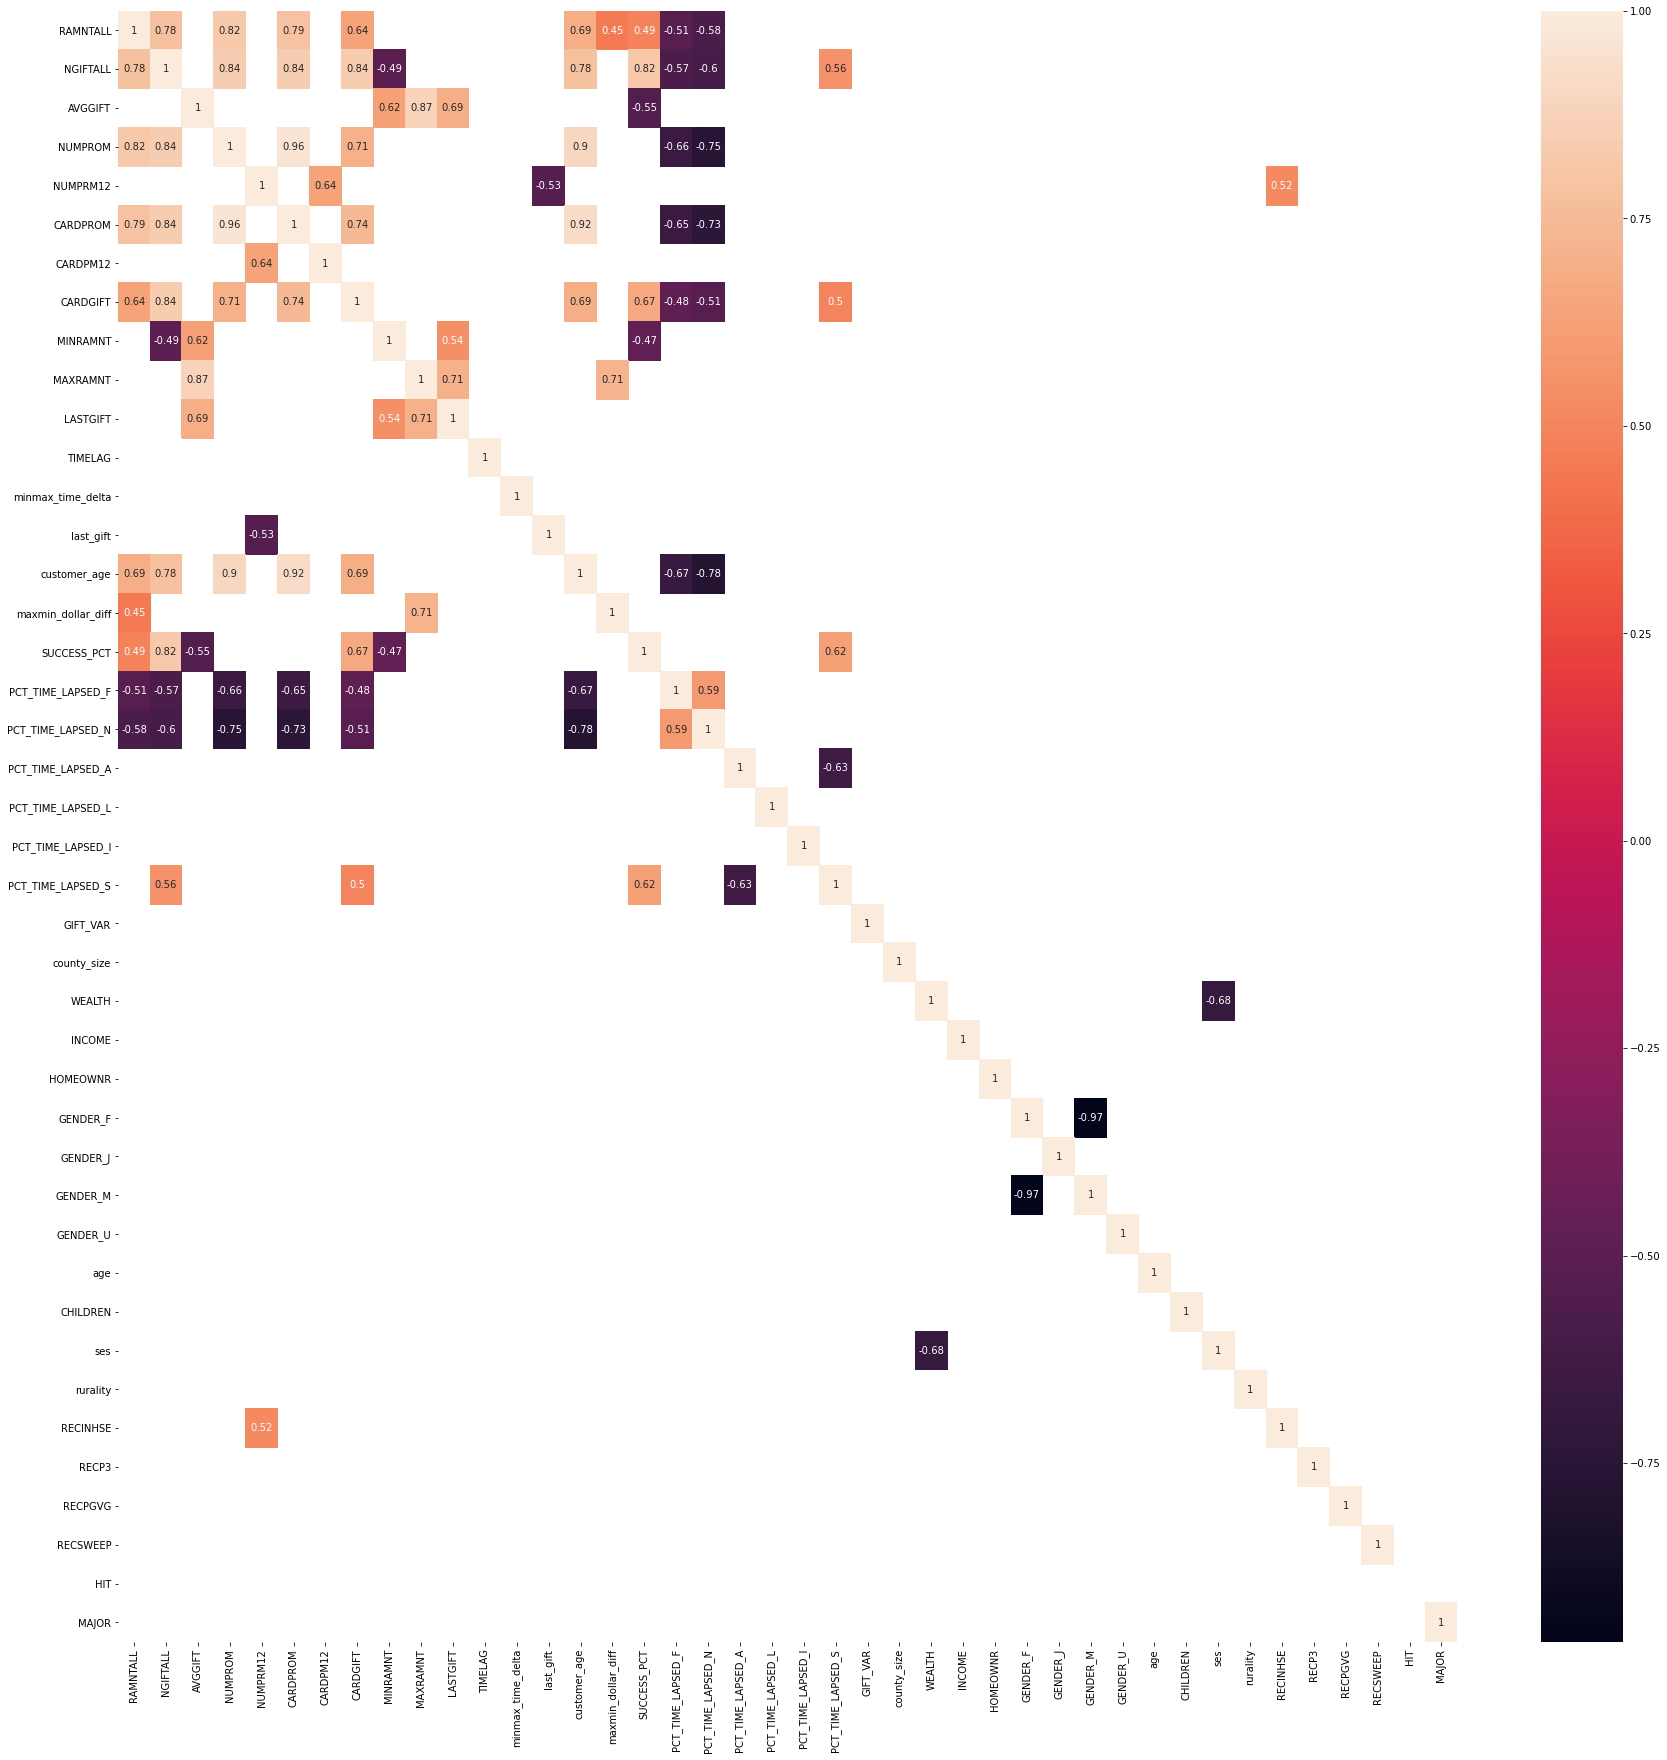

In [84]:
corr = modified_df.corr()
corr = corr[np.abs(corr) > 0.45]


plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)
plt.show()

## </br>

## Save final Dataframe into CSV

In [85]:
modified_df.head()

,RAMNTALL,NGIFTALL,AVGGIFT,NUMPROM,NUMPRM12,CARDPROM,CARDPM12,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,minmax_time_delta,last_gift,customer_age,maxmin_dollar_diff,SUCCESS_PCT,PCT_TIME_LAPSED_F,PCT_TIME_LAPSED_N,PCT_TIME_LAPSED_A,PCT_TIME_LAPSED_L,PCT_TIME_LAPSED_I,PCT_TIME_LAPSED_S,GIFT_VAR,county_size,WEALTH,INCOME,HOMEOWNR,GENDER_F,GENDER_J,GENDER_M,GENDER_U,age,CHILDREN,ses,rurality,RECINHSE,RECP3,RECPGVG,RECSWEEP,HIT,MAJOR
1,1.672098,0.477121,1.194977,1.505150,1.113943,1.079181,0.778151,0.000000,1.000000,1.397940,1.397940,1.255273,-791,2.738781,3.126781,3.906891,0.093750,0.031250,0.125000,0.312500,0.062500,0.000000,0.000000,1.926857,2.0,9.0,6.0,1,0,0,1,0,5.459432,1,1,2,0,0,0,0,-1,0
3,2.037426,1.204120,0.833307,1.819544,1.146128,1.431364,0.778151,0.845098,0.301030,1.041393,1.000000,0.954243,-2557,2.738781,3.576687,3.169925,0.242424,0.000000,0.000000,0.060606,0.015152,0.000000,0.227273,0.591595,3.0,4.0,1.0,0,1,0,0,0,6.087463,0,2,4,0,0,0,0,-1,0
4,2.404834,1.568202,0.836632,2.053078,1.397940,1.633468,1.000000,0.903090,0.477121,1.176091,1.176091,1.146128,-822,2.713491,3.823930,3.584963,0.327434,0.000000,0.000000,0.132743,0.044248,0.017699,0.000000,1.096910,1.0,2.0,3.0,1,1,0,0,0,6.247928,1,2,2,1,1,0,0,-1,0
6,2.029384,1.146128,0.883256,1.799341,0.954243,1.414973,0.602060,0.903090,0.477121,1.079181,1.041393,0.602060,-2710,2.898725,3.580241,3.169925,0.222222,0.000000,0.000000,0.126984,0.015873,0.000000,0.174603,-1.000000,4.0,6.0,4.0,1,1,0,0,0,5.169925,1,2,3,0,0,0,0,-1,0
11,1.397940,0.301030,1.096910,1.230449,1.079181,0.903090,0.778151,0.301030,1.000000,1.176091,1.000000,0.477121,91,2.738781,2.805501,2.321928,0.117647,0.117647,0.235294,0.000000,0.058824,0.000000,0.000000,-1.000000,2.0,5.0,1.0,0,0,0,1,0,6.189825,0,2,2,0,0,0,0,-1,0


In [86]:
modified_df.to_csv('../Exports/CSV/other_columns.csv')